## Import libraries

In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import CategoricalDtype

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/usr/local/python/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


## Data download

In [2]:
#Importing gdf usv for series 1 to 7
usv_series1 = gpd.read_file("../../../data/external/temporal_todocker/usodesueloyveg_series1_pasodelnorte.gpkg")
usv_series2 = gpd.read_file("../../../data/external/temporal_todocker/usodesueloyveg_series2_pasodelnorte.gpkg")
usv_series3 = gpd.read_file("../../../data/external/temporal_todocker/usodesueloyveg_series3_pasodelnorte.gpkg")
usv_series4 = gpd.read_file("../../../data/external/temporal_todocker/usodesueloyveg_series4_pasodelnorte.gpkg")
usv_series5 = gpd.read_file("../../../data/external/temporal_todocker/usodesueloyveg_series5_pasodelnorte.gpkg")
usv_series6 = gpd.read_file("../../../data/external/temporal_todocker/usodesueloyveg_series6_pasodelnorte.gpkg")
usv_series7 = gpd.read_file("../../../data/external/temporal_todocker/usodesueloyveg_series7_pasodelnorte.gpkg")

## Data treatment

### Data treatment - Calculate areas

In [3]:
gdf_list = [usv_series1,usv_series2,usv_series3,usv_series4,usv_series5,usv_series6,usv_series7]

for gdf in gdf_list:
    gdf.to_crs("EPSG:6372",inplace=True)
    gdf['area_has'] = gdf['geometry'].area/10000
    gdf = gdf.to_crs("EPSG:4326",inplace=True)

### Data treatment - Create categories

In [4]:
#Rename column 'DESCRIPCIO' to 'descripcio' in order for following categorization to work on all gdfs
usv_series6.rename(columns={'DESCRIPCIO':'descripcio'},inplace=True)
usv_series7.rename(columns={'DESCRIPCIO':'descripcio'},inplace=True)

In [32]:
#Dictionary of 'descripcio' varieties applicable for current analysis zone and its category:

series_cat_type = {'Agricultura':['AGRICULTURA DE TEMPORAL',
                                  'AGRICULTURA DE RIEGO',
                                  'AGRICULTURA DE RIEGO ANUAL Y SEMIPERMANENTE',
                                  'AGRICULTURA DE TEMPORAL ANUAL',
                                  'AGRICULTURA DE RIEGO ANUAL',
                                  'AGRICULTURA DE RIEGO SEMIPERMANENTE',
                                  'AGRICULTURA DE RIEGO PERMANENTE'],
                    
                   'Bosque':['BOSQUE DE ENCINO','VEGETACIÃ“N SECUNDARIA ARBUSTIVA DE BOSQUE DE ENCINO',
                             'BOSQUE DE PINO-ENCINO','VEGETACIÃ“N SECUNDARIA ARBUSTIVA DE BOSQUE DE PINO-ENCINO',
                             'BOSQUE DE ENCINO-PINO','VEGETACIÃ“N SECUNDARIA ARBUSTIVA DE BOSQUE DE ENCINO-PINO',
                             'BOSQUE DE GALERÃ\x8dA','VEGETACIÃ“N SECUNDARIA ARBUSTIVA DE BOSQUE DE GALERÃ\x8dA','VEGETACIÃ“N SECUNDARIA ARBUSTIVA DE VEGETACIÃ“N DE GALERÃ\x8dA'],
                    
                   'Cuerpo de agua':['CUERPO DE AGUA','AGUA'],
                   
                   'Deprovisto de vegetación':['DESPROVISTO DE VEGETACIÃ“N','Ã\x81REA DESPROVISTA DE VEGETACIÃ“N'],
                    
                   'Matorral':['MATORRAL DESÃ‰RTICO MICRÃ“FILO','VEGETACIÃ“N SECUNDARIA ARBUSTIVA DE MATORRAL DESÃ‰RTICO MICRÃ“FILO',
                               'MATORRAL DESÃ‰RTICO MICROFILO CON MATORRAL SUBINERME',
                               'MATORRAL DESÃ‰RTICO MICROFILO Y MATORRAL SUBINERME CON EROSIÃ“N',
                               'MATORRAL DESÃ‰RTICO MICROFILO CON MATORRAL ESPINOSO',
                               'MATORRAL DESÃ‰RTICO ROSETÃ“FILO','VEGETACIÃ“N SECUNDARIA ARBUSTIVA DE MATORRAL DESÃ‰RTICO ROSETÃ“FILO',
                               'MATORRAL DESÃ‰RTICO ROSETÃ“FILO CON MATORRAL SUBINERME'],
                    
                   'Pastizal':['PASTIZAL NATURAL','VEGETACIÃ“N SECUNDARIA ARBUSTIVA DE PASTIZAL NATURAL',
                               'PASTIZAL INDUCIDO',
                               'PASTIZAL HALÃ“FILO'],
                   
                   'Zona urbana':['ZONA URBANA',
                                  'ASENTAMIENTOS HUMANOS',
                                  'URBANO CONSTRUIDO']}

In [29]:
gdf_list = [usv_series1,usv_series2,usv_series3,usv_series4,usv_series5,usv_series6,usv_series7]

#For each gdf
for gdf in gdf_list:
    
    #Look in each available category
    for cat in series_cat_type.keys():
        
        #Look for each type
        for tipo in series_cat_type[cat]:
            
            #Find that type in current gdf and assign it category
            idx = gdf['descripcio'] == tipo
            gdf.loc[idx,'category'] = cat

In [30]:
#Check if something is not categorized:
gdf_list = [usv_series1,usv_series2,usv_series3,usv_series4,usv_series5,usv_series6,usv_series7]
problem_dicc = {}
i = 1

for gdf in gdf_list:
    unsolved_types = usv_series7.loc[usv_series7['category'].isna()]
    num_unsolved_types = len(unsolved_types.descripcio.unique())
    print('usv_series{} has '.format(i),num_unsolved_types,' types without an assigned category.')
    i = i+1

usv_series1 has  0  types without an assigned category.
usv_series2 has  0  types without an assigned category.
usv_series3 has  0  types without an assigned category.
usv_series4 has  0  types without an assigned category.
usv_series5 has  0  types without an assigned category.
usv_series6 has  0  types without an assigned category.
usv_series7 has  0  types without an assigned category.


## Data analysis

### Data analysis - Areas by 'category'

In [105]:
#Create an empty df with available spaces for all categories and all usv_series
categories_dicc = {'Agricultura':[0,0,0,0,0,0,0],
                   'Bosque':[0,0,0,0,0,0,0],
                   'Cuerpo de agua':[0,0,0,0,0,0,0],
                   'Deprovisto de vegetación':[0,0,0,0,0,0,0],
                   'Matorral':[0,0,0,0,0,0,0],
                   'Pastizal':[0,0,0,0,0,0,0],
                   'Zona urbana':[0,0,0,0,0,0,0]}

categorical_count = pd.DataFrame.from_dict(categories_dicc, 
                                           orient='index',  
                                           columns=['usv_series1','usv_series2','usv_series3','usv_series4','usv_series5','usv_series6','usv_series7'])

#Add group-by values to corresponding cell in df
i = 1
#In each gdf
for gdf in gdf_list:
    #Count areas by category and save to temporary count
    temp_count = gdf.groupby('category').agg({'area_has':np.sum})
    
    #Join in one gdf
    for cat in temp_count.index.unique():
        location_intable = cat,'usv_series{}'.format(i)
        calculated_value = cat,'area_has'
        categorical_count.loc[location_intable] = temp_count.loc[calculated_value]
        
    #Next usv_series{}
    i = i + 1

categorical_count

,usv_series1,usv_series2,usv_series3,usv_series4,usv_series5,usv_series6,usv_series7
Agricultura,21533.253292,27951.802105,31345.993023,34071.241480,31874.190478,31562.311848,25766.590252
Bosque,56506.187201,61152.444119,61152.356632,61138.666411,61307.486449,61376.660951,62110.646529
Cuerpo de agua,0.000000,300.098888,300.113159,300.101618,300.092678,300.092685,298.338661
Deprovisto de vegetación,0.000000,0.000000,0.000000,0.000000,87.968731,235.739959,553.043746
Matorral,145506.748810,89919.076310,82477.348029,75390.353848,74391.522263,73071.359995,72246.761054
Pastizal,34407.996160,65837.171294,66510.470988,64683.007149,65448.940154,65448.939879,71375.722802
Zona urbana,3217.183308,16010.573078,19386.003883,25588.608095,27761.742338,29176.827442,28820.769148


<Axes: >

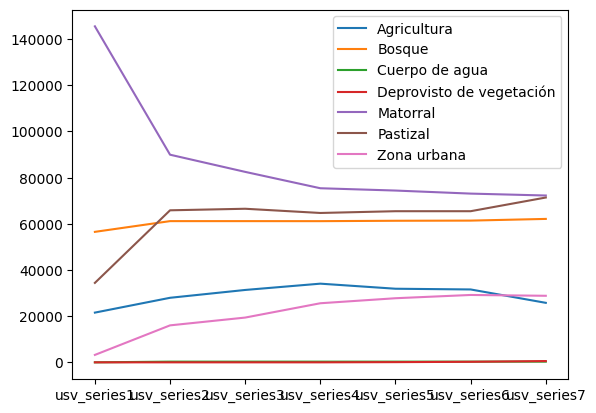

In [113]:
plotdf = categorical_count.T
plotdf.plot()

### Data analysis - Areas by 'descripcio'

In [37]:
series1_areas = usv_series1_calc.groupby('descripcio').agg({'area_has':np.sum})
series1_areas

,area_has
descripcio,
AGRICULTURA DE RIEGO,9099.442284
AGRICULTURA DE TEMPORAL,12433.811008
BOSQUE DE ENCINO,44692.490456
BOSQUE DE ENCINO-PINO,2492.327038
BOSQUE DE PINO-ENCINO,9273.069635
MATORRAL DESÃ‰RTICO MICROFILO CON MATORRAL ESPINOSO,56506.274946
MATORRAL DESÃ‰RTICO MICROFILO CON MATORRAL SUBINERME,85328.602253
MATORRAL DESÃ‰RTICO MICROFILO Y MATORRAL SUBINERME CON EROSIÃ“N,1673.991066
MATORRAL DESÃ‰RTICO ROSETÃ“FILO CON MATORRAL SUBINERME,1997.880546


In [38]:
series2_areas = usv_series2_calc.groupby('descripcio').agg({'area_has':np.sum})
series2_areas

,area_has
descripcio,
AGRICULTURA DE RIEGO ANUAL,5192.262649
AGRICULTURA DE RIEGO ANUAL Y SEMIPERMANENTE,4064.099190
AGRICULTURA DE RIEGO SEMIPERMANENTE,1898.684888
AGRICULTURA DE TEMPORAL ANUAL,16796.755377
BOSQUE DE ENCINO,46220.462705
BOSQUE DE ENCINO-PINO,1919.097233
BOSQUE DE PINO-ENCINO,9157.643063
CUERPO DE AGUA,300.098888
MATORRAL DESÃ‰RTICO MICRÃ“FILO,86911.778718


In [39]:
series3_areas = usv_series3_calc.groupby('descripcio').agg({'area_has':np.sum})
series3_areas

,area_has
descripcio,
AGRICULTURA DE RIEGO ANUAL,4648.885036
AGRICULTURA DE RIEGO ANUAL Y SEMIPERMANENTE,7371.568730
AGRICULTURA DE TEMPORAL ANUAL,19325.539257
ASENTAMIENTOS HUMANOS,3364.022529
BOSQUE DE ENCINO,45810.973486
BOSQUE DE ENCINO-PINO,1919.039864
BOSQUE DE PINO-ENCINO,9157.661804
CUERPO DE AGUA,300.113159
MATORRAL DESÃ‰RTICO MICRÃ“FILO,78616.765962


In [40]:
series4_areas = usv_series4_calc.groupby('descripcio').agg({'area_has':np.sum})
series4_areas

,area_has
descripcio,
AGRICULTURA DE RIEGO ANUAL,4848.416813
AGRICULTURA DE RIEGO ANUAL Y SEMIPERMANENTE,7216.739415
AGRICULTURA DE TEMPORAL ANUAL,22006.085253
ASENTAMIENTOS HUMANOS,9560.548408
BOSQUE DE ENCINO,45808.071443
BOSQUE DE ENCINO-PINO,1916.697074
BOSQUE DE PINO-ENCINO,9151.522223
CUERPO DE AGUA,300.101618
MATORRAL DESÃ‰RTICO MICRÃ“FILO,71733.912063


In [41]:
series5_areas = usv_series5_calc.groupby('descripcio').agg({'area_has':np.sum})
series5_areas

,area_has
descripcio,
AGRICULTURA DE RIEGO ANUAL,4378.874663
AGRICULTURA DE RIEGO ANUAL Y SEMIPERMANENTE,6959.955210
AGRICULTURA DE RIEGO PERMANENTE,44.330874
AGRICULTURA DE TEMPORAL ANUAL,20491.029731
ASENTAMIENTOS HUMANOS,11778.461406
BOSQUE DE ENCINO,45997.466101
BOSQUE DE ENCINO-PINO,1917.431074
BOSQUE DE PINO-ENCINO,9154.629951
CUERPO DE AGUA,300.092678


In [43]:
series6_areas = usv_series6_calc.groupby('DESCRIPCIO').agg({'area_has':np.sum})
series6_areas

,area_has
DESCRIPCIO,
AGRICULTURA DE RIEGO ANUAL,4454.195671
AGRICULTURA DE RIEGO ANUAL Y SEMIPERMANENTE,6966.458544
AGRICULTURA DE RIEGO PERMANENTE,44.330879
AGRICULTURA DE TEMPORAL ANUAL,20097.326753
AGUA,300.092685
BOSQUE DE ENCINO,45873.155041
BOSQUE DE ENCINO-PINO,1917.431100
BOSQUE DE GALERÃA,69.181953
BOSQUE DE PINO-ENCINO,9278.933427


In [44]:
series7_areas = usv_series7_calc.groupby('DESCRIPCIO').agg({'area_has':np.sum})
series7_areas

,area_has
DESCRIPCIO,
AGRICULTURA DE RIEGO ANUAL,3743.765956
AGRICULTURA DE RIEGO ANUAL Y SEMIPERMANENTE,5552.523934
AGRICULTURA DE RIEGO PERMANENTE,654.150333
AGRICULTURA DE TEMPORAL ANUAL,15816.150030
ASENTAMIENTOS HUMANOS,28820.769148
BOSQUE DE ENCINO,45280.555388
BOSQUE DE ENCINO-PINO,1917.431097
BOSQUE DE GALERÃA,101.091238
BOSQUE DE PINO-ENCINO,9889.424864
